# This is Guillermo's test version of this code

In [1]:
import tensorflow as tf
import utils as u
import h5py
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import os
import numpy as np

Using TensorFlow backend.


In [2]:
data_folder = '../data/'
file_name = 'HCAL_digi+rechit_occ.hdf5'
group = 'DigiTask_Occupancy_depth_depth1'

input_file=h5py.File(data_folder+"/"+file_name,'r')

To list all groups 

I want to see what's inside the file

I will print input_file and data_sample 

I will also want to look at the keys of the file

In [3]:
data_sample = np.array(input_file[group])
data = np.array(input_file)
data_samplesize=data_sample.shape
print data_samplesize
data_size=data.shape

(999, 72, 84)


I would like to print the first entry of this file 


Shape of image is:  (72, 84)
input image is 
 
[[    0.     0.  1350. ...,  1350.     0.     0.]
 [    0.     0.     0. ...,     0.     0.     0.]
 [ 1350.  1350.  1350. ...,  1350.  1350.  1350.]
 ..., 
 [    0.     0.     0. ...,     0.     0.     0.]
 [ 1350.  1350.  1350. ...,  1350.  1350.  1350.]
 [    0.     0.     0. ...,     0.     0.     0.]]


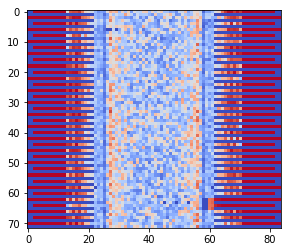

In [6]:
input_image=data_sample[0]

print "Shape of image is: ",input_image.shape
print 'input image is \n '
print input_image

im=plt.imshow(input_image,cmap=cm.coolwarm)

plt.show()
plt.clf()#plt.clf clears the figure and it's axis but leaves the window open. 
         #as opposed to plt.close which closes the window. If you are showing many images at a time without
         #closing the window it is better.
        
        
input_image=np.reshape(input_image,(input_image.shape[0],input_image.shape[1]))


# Using a for loop to plot the average occupancy map

Now I would like to plot the average occupancy graph for this group

	
 the average image is= 


[[    0.            0.         1564.2982983 ...,  1564.2982983     0.
      0.       ]
 [    0.            0.            0.        ...,     0.            0.
      0.       ]
 [ 1564.2982983  1564.2982983  1564.2982983 ...,  1564.2982983
   1564.2982983  1564.2982983]
 ..., 
 [    0.            0.            0.        ...,     0.            0.
      0.       ]
 [ 1564.2982983  1564.2982983  1564.2982983 ...,  1564.2982983
   1564.2982983  1564.2982983]
 [    0.            0.            0.        ...,     0.            0.
      0.       ]]
 
 
 Shape of image is: 
(72, 84)


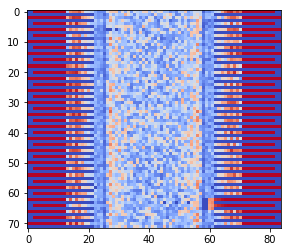

In [7]:
sum_image=np.zeros((data_samplesize[1],data_samplesize[2]))

for i in range(data_samplesize[1]):
    
    for j in range(data_samplesize[2]):
        
        for input_image in data_sample:
            
            sum_image[i,j]+=input_image[i,j]
            
                
#print '\t \n the sum image is= \n\n\n',sum_image


average_image=sum_image/data_samplesize[0]


print '\t\n the average image is= \n\n\n',average_image

    #average_image= np.average(input_image, axis=0, weights=None, returned=False)#average image of rows
    #average_image= np.average(input_image,axis=1,weights=None,returned=False)#average image of colums
    #average_image= np.average(input_image,axis=None,weights=None,returned=False)#average image of all elements

print' \n \n Shape of image is: \n',average_image.shape


im=plt.imshow(average_image,cmap=cm.coolwarm)
    
    
plt.show()
plt.clf()#plt.clf clears the figure and it's axis but leaves the window open. 
                 #as opposed to plt.close which closes the window. If you are showing many images at a time without
                 #closing the window is better.

    #input_image=np.reshape(input_image,(input_image.shape[0],input_image.shape[1]))

# Using a vectorized method to plot the average occupancy map

To print the mean value of the occupancy map we do the following ( I thank Tielige for this part ) :D

va mean is : 
[[    0.            0.         1564.2982983 ...,  1564.2982983     0.
      0.       ]
 [    0.            0.            0.        ...,     0.            0.
      0.       ]
 [ 1564.2982983  1564.2982983  1564.2982983 ...,  1564.2982983
   1564.2982983  1564.2982983]
 ..., 
 [    0.            0.            0.        ...,     0.            0.
      0.       ]
 [ 1564.2982983  1564.2982983  1564.2982983 ...,  1564.2982983
   1564.2982983  1564.2982983]
 [    0.            0.            0.        ...,     0.            0.
      0.       ]]
('Shape of image is: ', (72, 84))


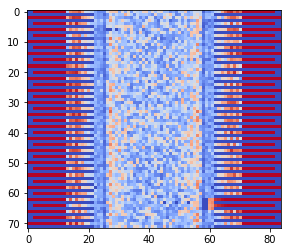

In [8]:
va = np.zeros((data_samplesize[1],data_samplesize[2]))

for x in data_sample:      
    va = va+x
    
vamean= va/data_samplesize[0]
#print ('va is: ' ,va)
print 'va mean is : \n', vamean


print('Shape of image is: ',vamean.shape)
    #print 'average image is \n '
    #print input_image

im=plt.imshow(vamean,cmap=cm.coolwarm)
  
plt.show()
plt.clf() #plt.clf clears the figure and it's axis but leaves the window open. 
                 #as opposed to plt.close which closes the window. If you are showing many images at a time without
                 #closing the window is better.

#input_image=np.reshape(input_image,(input_image.shape[0],input_image.shape[1]))



We would like to verify if both of these methods achived the same calculation

In [9]:

np.all (average_image== vamean)

True


# Let's see if we can plot a specific channel with time

Let's choose the channel in the (50,50) position for all lumisections. This is the same as data_sample[:,50,50]

In [10]:
a=data_sample[:,50,50]
print a
print a.shape
print np.mean(a)
print np.mean(a)/23

[  797.   804.   775.   744.   829.  1099.  1071.  1062.  1082.  1159.
  1096.  1055.  1106.  1043.  1098.  1066.  1107.  1043.  1096.  1043.
  1061.  1114.  1109.  1040.  1138.  1083.  1067.  1096.  1100.  1028.
  1077.  1122.  1108.  1144.  1062.  1077.  1036.  1062.  1087.  1040.
  1069.  1118.  1093.  1095.  1124.  1028.  1127.  1065.  1077.  1044.
  1057.  1011.  1045.  1099.  1053.  1088.  1013.  1052.  1082.  1032.
  1113.  1038.  1026.   999.   964.  1000.  1011.  1049.  1059.   970.
  1023.   992.  1079.  1026.  1027.  1073.  1044.  1082.  1066.  1063.
  1011.  1065.  1059.   778.   184.  1038.   998.  1048.  1011.  1060.
  1008.   952.   958.  1033.  1040.   994.  1011.  1020.   963.  1029.
  1009.  1006.  1017.  1007.   966.  1081.  1033.  1010.  1016.  1013.
   988.   966.  1029.   275.   958.   980.  1031.   994.   942.   927.
  1003.  1016.   921.   953.  1004.   936.   936.   963.   552.   952.
   978.   936.   892.   939.  1004.   937.   897.   970.   950.   995.
   923

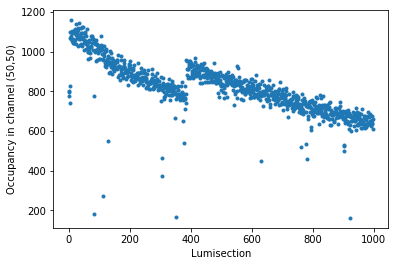

In [11]:
plt.plot(a,'.')
plt.xlabel('Lumisection')
plt.ylabel('Occupancy in channel (50,50)')
plt.show()

# Lets read a different group in the file

[[[    0.     0.  1350. ...,  1350.     0.     0.]
  [    0.     0.     0. ...,     0.     0.     0.]
  [ 1350.  1350.  1350. ...,  1350.  1350.  1350.]
  ..., 
  [    0.     0.     0. ...,     0.     0.     0.]
  [ 1350.  1350.  1350. ...,  1350.  1350.  1350.]
  [    0.     0.     0. ...,     0.     0.     0.]]

 [[    0.     0.  1379. ...,  1379.     0.     0.]
  [    0.     0.     0. ...,     0.     0.     0.]
  [ 1379.  1379.  1379. ...,  1379.  1379.  1379.]
  ..., 
  [    0.     0.     0. ...,     0.     0.     0.]
  [ 1379.  1379.  1379. ...,  1379.  1379.  1379.]
  [    0.     0.     0. ...,     0.     0.     0.]]

 [[    0.     0.  1366. ...,  1366.     0.     0.]
  [    0.     0.     0. ...,     0.     0.     0.]
  [ 1366.  1366.  1365. ...,  1366.  1366.  1366.]
  ..., 
  [    0.     0.     0. ...,     0.     0.     0.]
  [ 1366.  1366.  1366. ...,  1366.  1366.  1366.]
  [    0.     0.     0. ...,     0.     0.     0.]]

 ..., 
 [[    0.     0.  1285. ...,  1285.     0.   

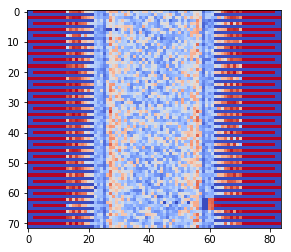

In [12]:
data_folder = '../data/'
file_name = 'HCAL_digi+rechit_occ.hdf5'
group = 'RecHitTask_Occupancy_depth_depth1'

input_file=h5py.File(data_folder+"/"+file_name,'r')

data1 = np.array(input_file)
data_size1=data.shape

data_sample1 = np.array(input_file[group])
data_samplesize1=data_sample.shape



print data_sample1
print group
'''[u'DigiTask_Occupancy_depth_depth1' u'DigiTask_Occupancy_depth_depth2'
 u'DigiTask_Occupancy_depth_depth3' u'DigiTask_Occupancy_depth_depth4'
 u'DigiTask_Occupancy_depth_depth5' u'DigiTask_Occupancy_depth_depth6'
 u'DigiTask_Occupancy_depth_depth7' u'RecHitTask_Occupancy_depth_depth1'
 u'RecHitTask_Occupancy_depth_depth2' u'RecHitTask_Occupancy_depth_depth3'
 u'RecHitTask_Occupancy_depth_depth4' u'RecHitTask_Occupancy_depth_depth5'
 u'RecHitTask_Occupancy_depth_depth6' u'RecHitTask_Occupancy_depth_depth7']
 '''
print data_samplesize1
print data1


input_image1=data_sample1[1]

print "Shape of image is: ",input_image1.shape
print 'input image is \n '
print input_image1

im=plt.imshow(input_image1,cmap=cm.coolwarm)

plt.show()
plt.clf()#plt.clf clears the figure and it's axis but leaves the window open. 
         #as opposed to plt.close which closes the window. If you are showing many images at a time without
         #closing the window it is better.
        
        
#input_image=np.reshape(input_image,(input_image.shape[0],input_image.shape[1]))

# I want to see if my kill region function and my hot region function work

Let's randomize this so that the region being killed is random

# Plotting my bad data image

# I would like to create about 100 bad data images

Shape of regular image is:  (999, 72, 84)
Shape of dead image is:  (999, 72, 84)
Shape of hot image is:  (999, 72, 84)



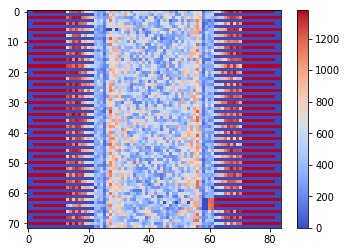

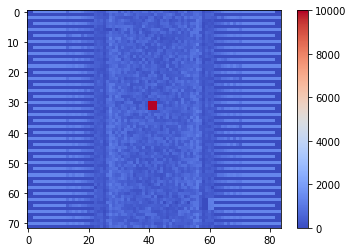

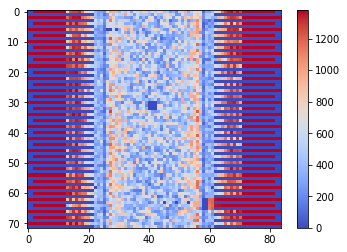

In [6]:
input_images=data_sample[:]
hotregion_image=[]
deadregion_image=[]

for k in input_images:
    a=np.random.randint(input_images.shape[2]-1)
    b=np.random.randint(input_images.shape[1]-1)
    xdim=(a,a+1)
    ydim=(b,b+1)
    xdim=(40,43)
    ydim=(30,33)
    
    hotregion_image.append( u.hotregion(k,xdim,ydim))
    deadregion_image.append(u.killregion(k,xdim,ydim))
       
    
hotregion_image=np.array(hotregion_image)
deadregion_image=np.array(deadregion_image)

print "Shape of regular image is: ",input_images.shape
print "Shape of dead image is: " ,deadregion_image.shape
print "Shape of hot image is: " ,hotregion_image.shape

print ''
im=plt.imshow(input_images[1],cmap=cm.coolwarm)
plt.colorbar()
plt.show()
plt.clf()

im=plt.imshow(hotregion_image[1],cmap=cm.coolwarm)
plt.colorbar()
plt.show()
plt.clf()#plt.clf clears the figure and it's axis but leaves the window open. 
         #as opposed to plt.close which closes the window. If you are showing many images at a time without
         #closing the window it is better.

im=plt.imshow(deadregion_image[1],cmap=cm.coolwarm)
plt.colorbar()
plt.show()
plt.clf()
#input_image=np.reshape(input_image,(input_image.shape[0],input_image.shape[1]))


# Let's start using keras and create a model

# With keras

# Trying out SKlearn 

Adding the bad data images to the sample

In [7]:
data_sample.shape


(999, 72, 84)

In [8]:
data_sample=np.append(data_sample,(deadregion_image),axis=0)
print data_sample.shape

data_sample=np.append(data_sample,(hotregion_image),axis=0)
print data_sample.shape

#data_sample=np.append(data_sample,(random_noise_region),axis=0)
#print data_sample.shape


(1998, 72, 84)
(2997, 72, 84)


Insert a column in every image of 1's or True ( this will represent it's label)

In [9]:
sample=np.reshape(data_sample,(data_sample.shape[0],data_sample.shape[1]*data_sample.shape[2]))
sample.shape


(2997, 6048)

In [10]:
#help(np.append)
sample=np.append(sample,np.zeros((sample.shape[0],1)),axis=1 )
sample.shape

(2997, 6049)

In [11]:
#this is because I am going to add the hot and dead region images

for i in range(2,0,-1):
    sample[-i*input_images.shape[0]:,-1:]=3-i
    print i
#if you want it as intergers leave this as it is
#if you would like it as a vector then do this
#y=to_categorical(y,4)


2
1


In [12]:
print sample[:,-1:]

[[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 2.]
 [ 2.]
 [ 2.]]


In [13]:
sample[:,-1:].shape

(2997, 1)

Let's define our Data and Lables

In [14]:
X=sample[:,:-1]
y=sample[:,-1]
print X.shape,'\n',y.shape

(2997, 6048) 
(2997,)


In [21]:
from sklearn.neural_network import MLPClassifier #this one takes too long
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score,auc,confusion_matrix,accuracy_score
from sklearn.cross_validation import train_test_split,cross_val_score
Xtrain,Xtest,ytrain, ytest=train_test_split(X,y,test_size=0.4,random_state =5 )

print Xtrain.shape
print Xtest.shape
print ytrain.shape
print ytest.shape

(1798, 6048)
(1199, 6048)
(1798,)
(1199,)


In [31]:
MLP = MLPClassifier( hidden_layer_sizes=(100,15), activation='relu', solver='adam',
                    alpha=0.0001, batch_size='auto', learning_rate='adaptive', learning_rate_init=0.001,
                    power_t=0.5, max_iter=1200, shuffle=True, random_state=None, tol=0.0001, verbose=False,
                    warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=True,
                    validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
scores= cross_val_score(MLP,Xtrain,ytrain,cv=10,scoring='accuracy')
print scores.mean()

0.564617238036


In [18]:
MLP.fit( Xtrain ,ytrain) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [22]:
pred=MLP.predict(Xtest)
print pred.shape
print accuracy_score(ytest,pred)


(1199,)
0.666388657214


In [24]:
logreg=LogisticRegression()
scores= cross_val_score(logreg,Xtrain,ytrain,cv=10,scoring='accuracy')
print scores.mean()

1.0


In [32]:
logreg.fit(Xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Evaluating the model 

In [ ]:
pred=logreg.predict(Xtest)
print pred.shape
print metrics.accuracy_score(ytest,pred)

In [ ]:
#calcualte null accuracy
max(ytest.mean(),1-ytest.mean())

In [ ]:
#Confusion matrix
print metrics.confusion_matrix(ytest,pred)

In [ ]:
print'True', ytest[0:15]
print 'Pred', pred[0:15]

In [ ]:
#save confusion matrix and slice into 4 pieces
confusion= metrics.confusion_matrix(ytest,pred)
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [ ]:
print TP
print TN
print FP
print FN

In [ ]:
#Clasification Accuracy
#how often is the Clf correct?
print (TP+TN)/ float(TP+TN+FP+FN)
print metrics.accuracy_score(ytest,pred)

In [ ]:
#Clasification Error
# how often is it incorrect?
print (FP+FN)/ float(TP+TN+FP+FN)
print 1- metrics.accuracy_score(ytest,pred)

In [ ]:
#Sensitivity
# How often if the prediction correct when the actual value is pos. 
#AKA True pos or Recall

print TP/ float(TP+FN)
print metrics.recall_score(ytest,pred)

In [ ]:
#Specificity 
# When the actual result is neg how often is it correct?
print TN/ float(TN+FP)

In [ ]:
#false positive
# When the actual value is negative how often is it incorrect
print FP/ float(TN+FP)

In [ ]:
#Precision
#When a positive value is predicted, how often is it correct?
print TP/ float(TP +FP)
print metrics.precision_score(ytest,pred)

# Adjusting the clasification threshold

In [ ]:
#print the first 10 predicted responses
logreg.predict(Xtest)[0:10]

In [ ]:
#print the first 10 predicted probabilities of class membership
logreg.predict_proba(Xtest)[0:10,:]

In [ ]:
#print the first 10 predicted probabilities for class 1
logreg.predict_proba(Xtest)[0:10,1]

In [ ]:
#store the predicted probabilities for class 1
y_pred_prob=logreg.predict_proba(Xtest)[:,1]

In [ ]:
#allow plots to appear in the notebook
%matplotlib inline
plt.rcParams['font.size']=14

In [ ]:
#histogram of predicted probabilities
plt.hist(y_pred_prob)#bins=8)
#plt.xlim(0,1)
plt.title("Histogram of predicted probabilities")
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')

# Decrease the threshold 

In [ ]:
#predict good if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
pred= binarize(y_pred_prob,0.3)[0]

In [ ]:
#print the first 10 predicted probabilities
y_pred_prob[0:10]

In [ ]:
#print the first 10 predicted classes with new thershold
pred[0:10]

In [ ]:
#print old confusion matrix
print confusion

In [ ]:
#print new confusion matrix
print metrics.confusion_matrix(ytest,pred)

# ROC Curves and Area Under the Curve (AUC)

In [ ]:
fpr,tpr,thresholds= metrics.roc_curve(ytest,y_pred_prob)
plt.plot(fpr,tpr)
#plt.xlim([0.0,1.0])
#plt.ylim([0.0,1.0])
plt.title('ROC Curve for good data clf')
plt.xlabel('False Pos Rate (1-Specificity)')
plt.ylabel('True Pos Rate(Sensitivity)')
plt.grid(True)

In [ ]:
#define a function that accepts a threshold and prints sensitivity and specificity
def evalualte_threshold(threshold):
    print 'Sensitivity:',tpr[thresholds > threshold][-1]
    print 'Specificity:',1- fpr[thresholds > threshold][-1]

In [ ]:
evalualte_threshold(.3)

# AUC is the percentage of the ROC plot that is under the curve

In [ ]:
print metrics.roc_auc_score(ytest,y_pred_prob)

This is useful as a single number summary of classifier performance

In [ ]:
# Calculate cross validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg,X,y,cv=10,scoring='roc_auc').mean()